In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Problem 1 
__States estimation with Kalman Filter__

In [3]:
q1 = pd.read_excel('./Problem_1_Data.xls', header=None, names=['q1_data'])

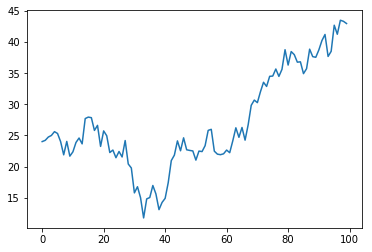

In [4]:
plt.plot(q1)

In [5]:
Y = q1.values
X = np.zeros(len(q1))
posterior = 1
X[0] = 15
for i in range(len(Y)-1):
    likelihood = 0.99 * X[i] + 0.2
    prior = 0.99**2 * posterior + 1
    kalman_gain = prior * 1.6 / (1.6**2 * prior + 1)
    X[i+1] = likelihood + kalman_gain * (Y[i] - 1.6 * likelihood)
    posterior = (1 - 1.6 * kalman_gain) * prior

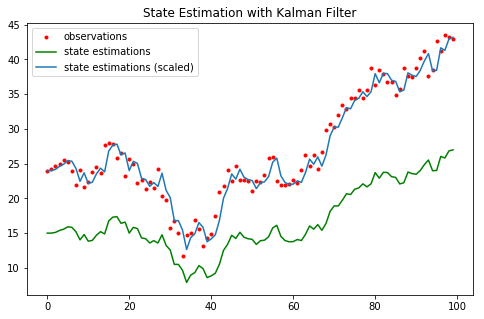

In [6]:
plt.figure(figsize=(8,5))
plt.plot(Y,'r.')
plt.plot(X,'g')
plt.plot(1.6*X)
plt.title('State Estimation with Kalman Filter')
plt.legend(['observations', 'state estimations','state estimations (scaled)'])
plt.savefig('problem_1.png', dpi=300)

### Problem 2
Statss and Parameter Estimation with Joint Filter

In [7]:
# load data 
q2 = pd.read_excel('./Problem_2_Data.xls', header=None)

In [8]:
# Initialization
Y = q2.values
X = np.zeros((2,len(Y)))
posterior = np.eye(2)
X[:,0] = [31, 3.1]

Q = np.array([[0.1**2,0],[0,0]])
R = np.array([0.1**2])
A = np.array([[0.9,1],[0,1]])
C = np.array([[1,0]])
I = np.eye(2)

posterior = I

In [9]:
# filtering
for i in range(len(Y)-1):
    # predict
    likelihood = np.dot(A, X[:,i].reshape(-1,1))
    prior =  np.dot(np.dot(A, posterior), A.T) + Q
    # update
    temp = np.dot(prior, C.T)
    kalman_gain = temp / (np.dot(C, temp) + R)
    X[:, i+1] = (likelihood + kalman_gain * (Y[i] - np.dot(C, likelihood)))[:,0]
    posterior = np.dot((I - np.dot(kalman_gain, C)), prior)

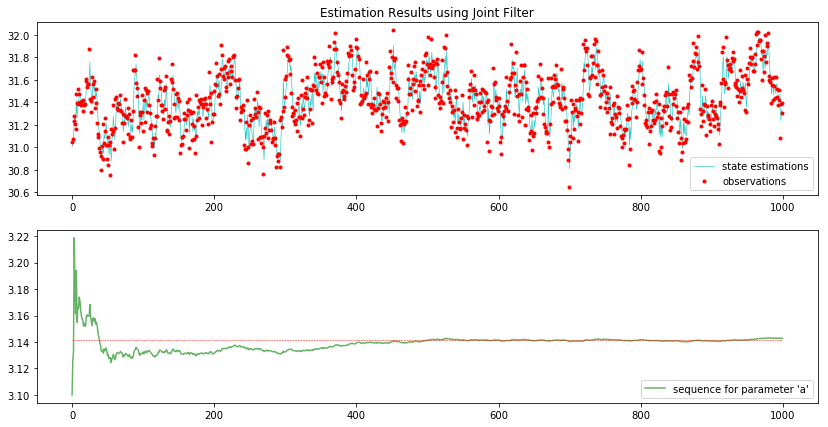

In [10]:
plt.figure(figsize=(14,7))
plt.subplot(211)
plt.plot(X[0,:],'c', linewidth=0.6, alpha=0.9)
plt.plot(Y,'r.')
plt.title('Estimation Results using Joint Filter')
plt.legend(['state estimations','observations'], loc=4)
plt.subplot(212)
plt.plot(X[1,:],'g',alpha=0.6)
plt.plot(np.mean(X[1,500:])*np.ones(X.shape[1]),'r--',linewidth=0.5)
plt.legend(['sequence for parameter \'a\''], loc=4)
plt.savefig('problem_2.png', dpi=300)

In [11]:
print(np.mean(X[1,500:]))

3.14139551766
